In [37]:
'''
This is about Ont-hotEncoder. This is used to convert String values to numeric as ML works with numerics.
Few things this covers :-
1. How to extract specific data types data into its own dataframe
2. How to convert String datatype to numeric using OneHotEncoder
3. How to convert NumPy to Dataframe using pd.Dataframe()
4. How to concat two dataframes
'''
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Sample data
data = pd.read_csv("data/Books.csv")

# 1. Extract categorical/string data. Encode categorical features (author, genre, language)
#categorical_cols = ['author', 'genre', 'language']
categorical_data = data.select_dtypes(include='object')

# 2. Drop the ones you dont want to use 
final_categorical_data = categorical_data.drop(columns=['title', 'releasedDate'])
categorical_cols = final_categorical_data.columns

# 3. Now run onehotEncoder on them
encoder = OneHotEncoder(sparse_output = False)
encoded_features = encoder.fit_transform(final_categorical_data)

# 4. Convert the encoded_features (as it is of type numPy array) to dataframe to be able to perform concatenation
encoded_column_names = encoder.get_feature_names_out(categorical_cols)
encoded_data = pd.DataFrame(encoded_features, columns=encoded_column_names)

# 5. Join this categorical data with the numeric data 
final_data = pd.concat([encoded_data, data.select_dtypes(include='number')], axis=1)
#final_data = pd.concat([encoded_data.reset_index(drop=True), data.select_dtypes(include='number').reset_index(drop=True)], axis=1)
print(final_data)



    author_Dan Brown  author_JK Rowling  author_Stephenie Meyer  \
0                0.0                1.0                     0.0   
1                0.0                1.0                     0.0   
2                0.0                1.0                     0.0   
3                0.0                1.0                     0.0   
4                0.0                1.0                     0.0   
5                0.0                1.0                     0.0   
6                0.0                1.0                     0.0   
7                0.0                0.0                     1.0   
8                0.0                0.0                     1.0   
9                0.0                0.0                     1.0   
10               0.0                0.0                     1.0   
11               0.0                0.0                     1.0   
12               1.0                0.0                     0.0   
13               1.0                0.0                     0.

In [51]:
'''
The following example is to understand when to use reset_index on the encoded/scaled data. 
And different ways to handle mis-alignment when soem rows are dropped.
'''

import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Sample DataFrame
data = pd.DataFrame({
    'name': ['Alice', 'Bob', 'Carol', 'Dave'],
    'age': [25, None, 27, 30],
    'city': ['NY', 'LA', None, 'SF']
})

# Drop rows where age=NaN
cleaned_data = data.dropna(subset=['age'])
print(cleaned_data)

# Now perform encoding of the city
encoder = OneHotEncoder(sparse_output=False)
encoded_city = encoder.fit_transform(cleaned_data[['city']])
encoded_cols = encoder.get_feature_names_out(['city'])
print(encoded_city)

#Now perform scaling on age
scalar = StandardScaler()
scaled_age = scalar.fit_transform(cleaned_data[['age']])
print(scaled_age)

#Now join the scaled_age and encoded_city back together as DataFrame;
city_dataframe = pd.DataFrame(encoded_city, columns=encoded_cols, index=cleaned_data.index)
age_dataframe = pd.DataFrame(scaled_age, columns=['age'], index=cleaned_data.index)
final_data = pd.concat([city_dataframe, age_dataframe], axis=1);
print(final_data)


    name   age  city
0  Alice  25.0    NY
2  Carol  27.0  None
3   Dave  30.0    SF
[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
[[-1.13554995]
 [-0.16222142]
 [ 1.29777137]]
   city_NY  city_SF  city_None       age
0      1.0      0.0        0.0 -1.135550
2      0.0      0.0        1.0 -0.162221
3      0.0      1.0        0.0  1.297771


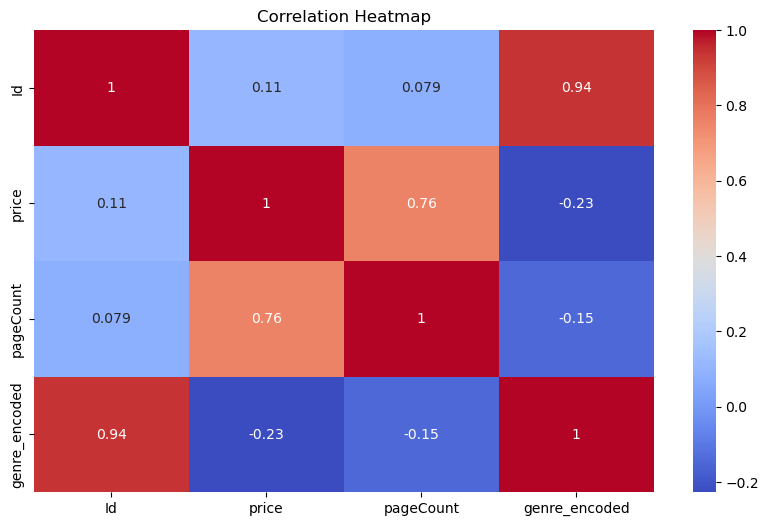

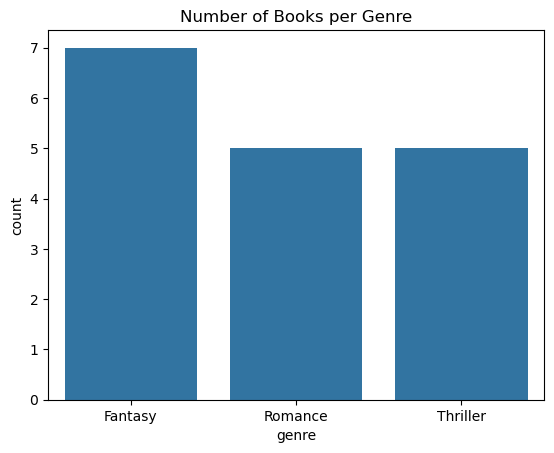

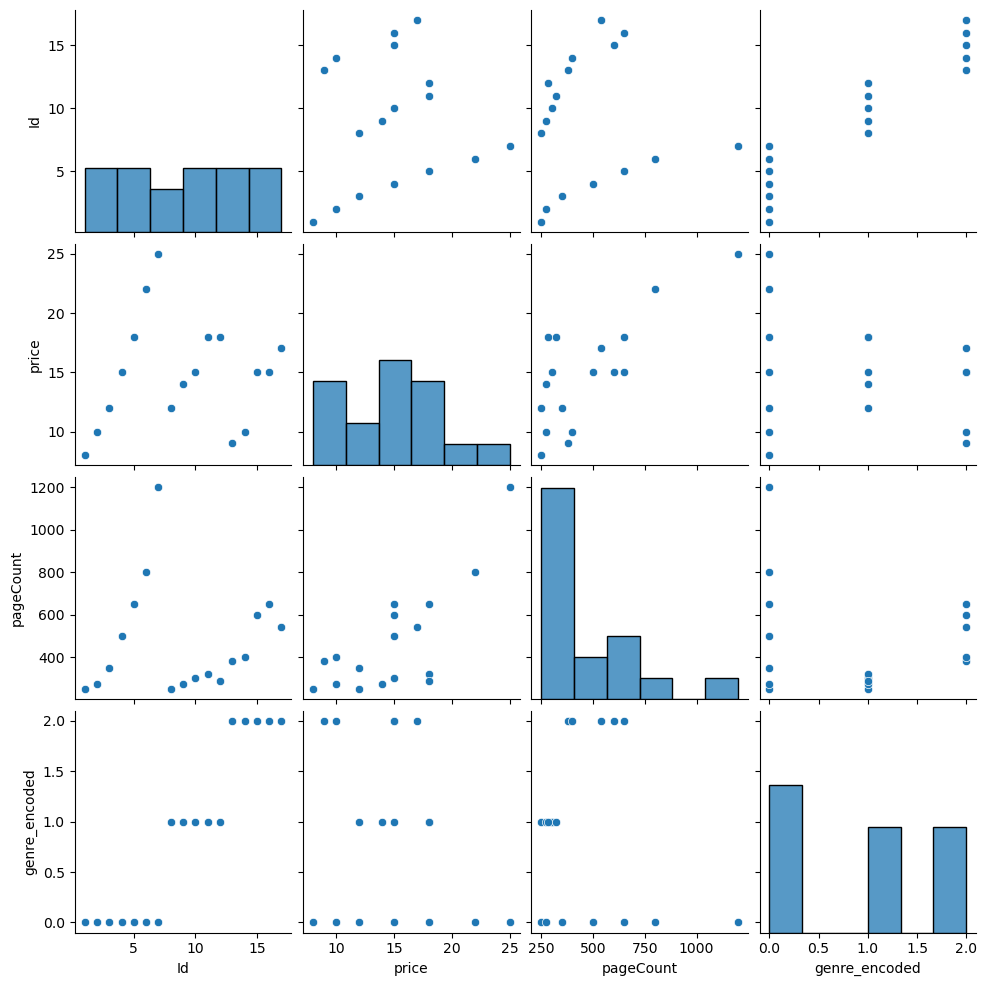

In [52]:
'''
About Seaborn, it is built on top of matplotlib. So the order of the lines are important. 
plt.figure() - it creates a blank canvas where Seaborn will draw
sns-heatmap() - draws on that figure defined above.
plt.show() - renders that figure. 
'''

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif

# Example DataFrame
df = pd.read_csv("data/Books.csv")
df['genre_encoded'] = df['genre'].map({'Fantasy': 0, 'Romance': 1, 'Thriller': 2})
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10,6)) #Tells how big the plot should look
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm') #annot=True means the correlation value will be displayed. 
plt.title("Correlation Heatmap")
plt.show()


sns.countplot(x='genre', data=df)
plt.title("Number of Books per Genre")
plt.show()

sns.pairplot(df)